In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, kstest
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb -O weight-height.csv

--2024-05-30 15:46:57--  https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.google.com (drive.google.com)... 172.253.63.113, 172.253.63.138, 172.253.63.100, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb [following]
--2024-05-30 15:46:57--  https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.111.132, 2607:f8b0:4004:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.02s   

2024-05-30 15:46:58 (18.0 M

In [ ]:
df_hw = pd.read_csv('weight-height.csv')
df_hw

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Height', ylabel='Count'>

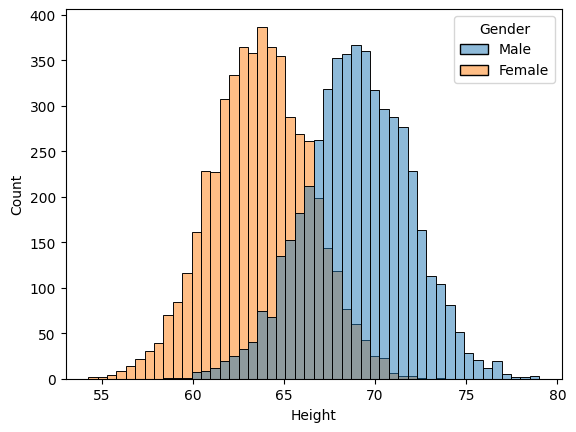

In [ ]:
sns.histplot(data=df_hw, x='Height', hue='Gender')

In [ ]:
height_men = df_hw[df_hw['Gender']=='Male']['Height']
height_women = df_hw[df_hw['Gender']=='Female']['Height']

In [ ]:
height_men.var()

8.198843252520467

In [ ]:
height_women.var()

7.2699474936701245

In [ ]:
height_men.mean()

69.02634590621741

In [ ]:
height_women.mean()

63.70877360342507

In [ ]:
# h0 : variances are equal

# ha : variances are not equal

from scipy.stats import levene

In [ ]:
l_stat, p_val = levene(height_men, height_women)
p_val

0.0004586349895436178

## TWO-Way ANOVA

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 -O two_way_anova.csv

--2024-05-30 16:16:19--  https://drive.google.com/uc?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.google.com (drive.google.com)... 172.253.63.113, 172.253.63.100, 172.253.63.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0 [following]
--2024-05-30 16:16:19--  https://drive.usercontent.google.com/download?id=1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1541 (1.5K) [application/octet-stream]
Saving to: ‘two_way_anova.csv’

two_way_anova.csv   100%[===================>]   1.50K  --.-KB/s    in 0s      

2024-05-30 16:16:20 (54.2 MB/

In [ ]:
df = pd.read_csv('two_way_anova.csv')
df


,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170
...,...,...,...
95,Lemon,South,131
96,Lemon,East,103
97,Orange,West,117
98,Lemon,South,82


In [ ]:
df['Flavour'].unique()

array(['Orange', 'Lemon', 'Cola'], dtype=object)

In [ ]:
df['Location'].unique()

array(['West', 'East', 'North', 'South'], dtype=object)

In [ ]:
test = ols('Sales~C(Flavour)*C(Location)', data=df).fit()
annova_table = sm.stats.anova_lm(test, typ=2)
annova_table

,sum_sq,df,F,PR(>F)
C(Flavour),6919.558981,2.0,1.968465,0.145773
C(Location),2059.273884,3.0,0.390546,0.760092
C(Flavour):C(Location),11802.257765,6.0,1.119163,0.357804
Residual,154669.016331,88.0,NaN,NaN


In a Two-way ANOVA, if the p-value for the interaction effect is significant, what can you conclude?


What is the primary difference between One-way ANOVA and Two-way ANOVA?

## ks test

In [ ]:
# Step - 1

#H0: The distrbutions of x and y are same

# Ha: The distributions of x and y are different

In [ ]:
r1 = [8.82420842, 7.47774471, 7.55712098, 7.98131439, 6.82771606,
       7.48566433, 9.15385732, 5.84040502, 8.26124313, 8.4728876 ,
       6.82582186, 7.00490974, 8.43423058, 6.72099932, 6.97495982,
       5.93748053, 5.40707847, 6.16385557, 6.71421056, 4.42396183,
       6.87285228, 8.00313581, 6.69035041, 7.83622942, 8.70984957,
       5.56284584, 9.08093437, 4.98165193, 7.67769408, 6.04738478,
       7.64921582, 7.31051639, 6.74463303, 7.27356973, 8.16787232,
       6.90990965, 7.06439167, 6.62921957, 6.08283539, 6.2458137 ,
       8.65173634, 5.76080646, 6.20573219, 8.91561004, 6.22560201,
       5.67542104, 6.97412435, 8.31354697, 8.14172701, 8.26099345,
       7.87612791, 6.24835109, 9.95324783, 6.59504627, 6.17365145,
       6.05676895, 7.23030223, 7.71311809, 7.37163804, 5.69798738,
       5.71056902, 7.94556876, 7.47234105, 6.85346234, 4.77892053,
       6.92631063, 6.10681151, 7.06277198, 7.18023164, 7.78285327,
       7.85500885, 6.54349161, 8.25949958, 6.44289198, 7.16705977,
       6.03517015, 7.61274786, 7.032845  , 6.78161745, 7.07917968,
       6.21549342, 5.34267439, 6.73039933, 7.70562561, 8.15117049,
       6.72564324, 6.68220904, 8.50359274, 7.52912703, 7.34572493,
       5.95734283, 6.58259396, 6.49394335, 8.68069592, 8.60547125,
       6.8905056 , 7.72575925, 6.84801609, 7.96999724, 7.10420915]

In [ ]:
r2 = [ 9.56597358,  7.49291458,  8.73841824,  7.63523452,  4.12559277,
        7.3679259 ,  9.87873565,  6.14516559,  8.19923821,  7.30169992,
       10.24606417,  6.83814477,  7.01611267,  6.15716049,  8.29590714,
       12.3333305 ,  8.22144016,  6.06830071,  3.75820649,  6.69220157,
       10.08721618,  9.70580422,  7.31050006, 11.40145721,  5.64818498,
        7.38914449,  8.43740074,  6.3451435 ,  7.05694361,  8.1997151 ,
        9.03059061,  7.76904679,  6.92375578,  5.78318543,  8.99027781,
        7.56186529,  5.27095372,  8.32896688, 11.52935757,  7.08119961,
        9.48825066,  9.14072759,  7.30357663,  8.62183754, 10.40999814,
        8.70096763,  7.04645384,  6.378799  , 10.5098363 ,  7.36078888,
        7.33403615,  8.07396248,  6.18309499,  7.24668404,  9.03430611,
        8.99016584,  6.78606416,  8.436418  ,  6.85877947, 10.10405772,
        6.74943076,  7.57812376,  7.12920671,  9.38065269,  9.57139966,
        6.4484012 ,  6.93877043,  9.22141667,  8.34815638,  7.73980671,
        7.17840767,  9.27913457,  6.49963224,  9.92287292,  7.63978639,
        9.53931977,  9.02602273,  6.79374185,  8.59715131,  8.37747338,
        8.78161815,  6.78716383,  8.28473394,  8.20283798, 12.50518811,
       10.19772574,  8.93758457,  8.9540311 ,  8.28927558,  6.28935098,
        7.69447559,  9.66777701, 10.33898342,  8.71199578,  5.12781581,
        9.70954569,  9.13685031,  7.28989718,  8.0868909 ,  7.42937556,
        7.31356749,  9.92345816,  8.60211814,  9.33228465,  8.14132658,
        6.17871495, 10.28358242,  7.31898597,  7.95085527,  6.20331719,
        9.19119762,  6.98600628,  7.05314883, 10.57921482,  6.83637574,
        7.86199283,  8.23350975,  5.87625665,  7.78945364,  8.83612492]

In [ ]:
d1 = np.array(r1)
d2 = np.array(r2)
n1 = len(d1)
n2 = len(d2)
n1, n2

(100, 120)

In [ ]:
ks_stat, p_val = kstest(d1, d2)
ks_stat, p_val

(0.3233333333333333, 1.516338798228849e-05)

In [ ]:
alpha = 0.01
if p_val < alpha:
  print('Reject the H0')
else:
  print('Fail to reject the H0')

Reject the H0


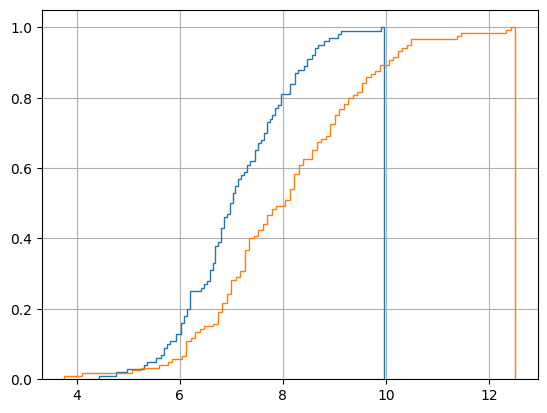

In [ ]:
plt.grid()
a = plt.hist(d1, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(d2, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

In [ ]:
data1 = [ 4.96714153,  1.38264301,  6.47688538, 15.23029856,  2.34153375,
        2.34136957, 15.79212816,  7.67434729,  4.69474386,  5.42560044,
        4.63417693,  4.65729754,  2.41962272, 19.13280245, 17.24917833,
        5.62287529, 10.1283112 ,  3.14247333,  9.08024076, 14.12303701,
       14.65648769,  2.257763  ,  0.67528205, 14.24748186,  5.44382725,
        1.1092259 , 11.50993577,  3.75698018,  6.0063869 ,  2.9169375 ,
        6.01706612, 18.52278185,  0.13497225, 10.57710929,  8.22544912,
       12.2084365 ,  2.08863595, 19.59670124, 13.28186049,  1.96861236,
        7.3846658 ,  1.71368281,  1.15648282,  3.01103696, 14.7852199 ,
        7.19844208,  4.60638771, 10.57122226,  3.4361829 , 17.63040155,
        3.24083969,  3.8508228 ,  6.76922   ,  6.11676289, 10.30999522,
        9.31280119,  8.39217523,  3.09212376,  3.31263431,  9.75545127,
        4.79174238,  1.85658977, 11.06334974, 11.96206624,  8.12525822,
       13.56240029,  0.72010122, 10.03532898,  3.61636025,  6.45119755,
        3.61395606, 15.38036566,  0.35826039, 15.64643656, 26.19745104,
        8.21902504,  0.87047068,  2.9900735 ,  0.91760777, 19.87568915,
        2.19671888,  3.57112572, 14.77894045,  5.18270218,  8.08493603,
        5.01757044,  9.15402118,  3.2875111 ,  5.29760204,  5.13267433,
        0.97077549,  9.68644991,  7.02053094,  3.27662147,  3.92108153,
       14.63514948,  2.96120277,  2.61055272,  0.05113457,  2.34587133]

In [ ]:
data2 = [14.15370742,  4.20645323,  3.42714517,  8.02277269,  1.61285712,
        4.04050857, 18.86185901,  1.74577813,  2.57550391,  0.74445916,
       19.18771215,  0.26513875,  0.6023021 , 24.63242112,  1.92360965,
        3.01547342,  0.3471177 , 11.68678038, 11.42822815,  7.51933033,
        7.91031947,  9.09387455, 14.02794311, 14.01851063,  5.86857094,
       21.90455626,  9.90536325,  5.6629773 ,  0.99651365,  5.03475654,
       15.50663431,  0.68562975, 10.62303714,  4.73592431,  9.19424234,
       15.49934405,  7.83253292,  3.22061516,  8.13517217, 12.30864316,
        2.27459935, 13.07142754, 16.07483235,  1.84633859,  2.59882794,
        7.81822872, 12.36950711, 13.20456613,  5.21941566,  2.96984673,
        2.5049285 ,  3.46448209,  6.80024722,  2.32253697,  2.93072473,
        7.14351418, 18.65774511,  4.73832921, 11.91303497,  6.56553609,
        9.7468167 ,  7.87084604, 11.58595579,  8.20682318,  9.63376129,
        4.12780927,  8.2206016 , 18.96792983,  2.45388116,  7.53736164,
        8.8951443 ,  8.15810285,  0.77101709,  3.41151975,  2.76690799,
        8.27183249,  0.13001892, 14.53534077,  2.64656833, 27.20169167,
        6.25667348,  8.57157556, 10.70892498,  4.82472415,  2.23462785,
        7.14000494,  4.73237625,  0.72828913,  8.46793718, 15.14847225,
        4.46514952,  8.56398794,  2.14093744, 12.45738779,  1.73180926,
        3.8531738 ,  8.83857436,  1.53725106,  0.58208718, 11.42970298,
        3.5778736 ,  5.60784526, 10.83051243, 10.53802052, 13.77669368,
        9.3782504 ,  5.15035267,  5.13785951,  5.15047686, 38.52731491,
        5.70890511, 11.3556564 ,  9.54001763,  6.51391251,  3.15269245,
        7.5896922 ,  7.72825215,  2.36818607,  4.85363548,  0.81874139]

In [ ]:
d1 = np.array(data1)
d2 = np.array(data2)
n1 = len(d1)
n2 = len(d2)
n1, n2

(100, 120)

In [ ]:
ks_stat, p_val = kstest(d1, d2)
ks_stat, p_val

(0.095, 0.671374753605883)

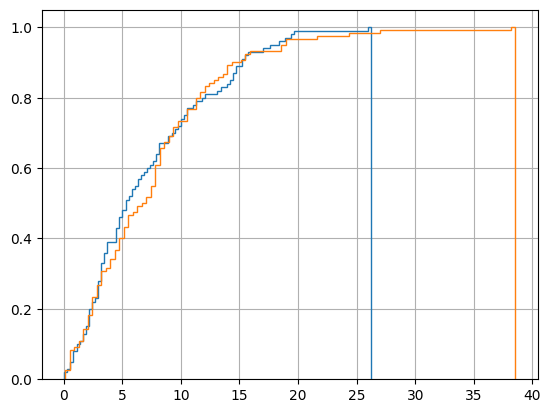

In [ ]:
plt.grid()
a = plt.hist(d1, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(d2, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

In a two-sample KS Test, if the p-value is very small (e.g., less than the significance level), what does it indicate?

## A/B Testing

In [ ]:
!gdown 1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1


Downloading...
From: https://drive.google.com/uc?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1
To: /content/ab_test_data.csv
100% 884k/884k [00:00<00:00, 98.4MB/s]


In [ ]:
ab_test_data = pd.read_csv('ab_test_data.csv')
ab_test_data

,date,customer_id,premium,watch_time_hrs,customer_segmnt
0,2018-09-11,402,0,7.173618,control
1,2018-02-28,227,0,0.836170,control
2,2018-10-18,812,1,4.402078,treatment
3,2018-05-22,43,0,3.982454,control
4,2018-07-18,307,0,7.513302,control
...,...,...,...,...,...
19955,2018-10-09,794,0,6.157144,treatment
19956,2018-05-21,479,0,4.319866,control
19957,2018-07-20,547,0,2.124289,treatment
19958,2018-10-23,431,0,0.452113,control


In [ ]:
ab_test_data['customer_segmnt'].value_counts()

customer_segmnt
treatment    9987
control      9973
Name: count, dtype: int64

<Axes: xlabel='watch_time_hrs', ylabel='Count'>

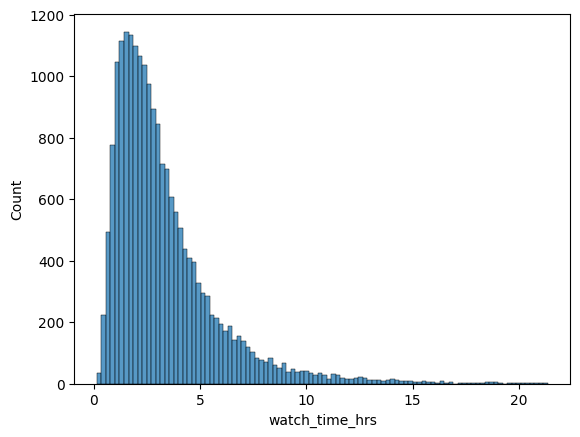

In [ ]:
sns.histplot(ab_test_data['watch_time_hrs'], bins=100)

In [ ]:
ab_test_data.groupby('customer_segmnt')['watch_time_hrs'].mean()

customer_segmnt
control      3.609960
treatment    3.054294
Name: watch_time_hrs, dtype: float64

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ab_test_control_data = ab_test_data[ab_test_data['customer_segmnt'] == 'control']
ab_test_treatment_data = ab_test_data[ab_test_data['customer_segmnt'] == 'treatment']

In [ ]:
t_stat, p_val = ttest_ind(ab_test_control_data['watch_time_hrs'], ab_test_treatment_data['watch_time_hrs'])
p_val

5.438408586231319e-57

What is the primary objective of A/B testing in the field of digital marketing and website optimization?

## Problem Statement

The Committee head of a national entrance exam wants to analyze if there are any differences in learning outcomes between students with different educational backgrounds (high school or college) and teaching methods (traditional or interactive) on test scores.


Data set: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/059/218/original/Teaching_Method.csv?1702373208

Options

    The teaching method significantly impacts student test scores, whereas educational background does not.

    The educational background significantly impacts student test scores, whereas the teaching method does not.
    
    There is significant interaction between educational background and teaching method on student performance.
    
    There is no significant interaction between educational background and teaching method on student performance.